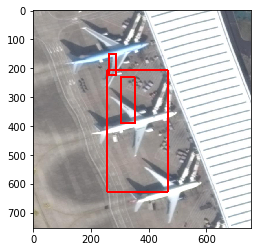

(<matplotlib.image.AxesImage at 0x1a448271320>, None)

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import cv2

img = cv2.imread('demo.tif')
cv2.rectangle(img, (465, 627), (256, 207), (0, 0, 255), 5)
cv2.rectangle(img, (262, 152), (287, 225), (0, 0, 255), 5)

cv2.rectangle(img, (352, 391), (302, 232), (0, 0, 255), 5)


# rRect = cv2.R RotatedRect(Point2f(100,100), Size2f(100,50), 30);
# Rect brect = rRect.boundingRect();
# rectangle(image, brect, Scalar(255,0,0));


# 465.837525364 627.858731845 256.753741002 207.864159476 1 16.5859465751 1.0
# 262.597330934 152.695559891 287.811671178 225.521194166 1 15.5876309351 1.0
# 352.980310194 391.275257434 302.48713802 232.075645504 1 14.6078609555 1.0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()

.rbox.scoreファイルには、各行が1つの境界ボックスに対応する複数の行が含まれている。各行には7つの数字が含まれる。

- 最初の2つの数字は、境界ボックスの中心点の位置
- 3-4は、境界ボックスの幅と高さ 
- DRBoxは1つのクラスの予測しか提供しないため、5番目はオブジェクトのラベル。これは最近1に固定されている。
- 6番目の数字は、このバウンディングボックスの角度（度）
- 7位がスコアです。検出されたオブジェクトはスコアでソートされる

a=[1 1 0]
R=[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.12323400e-17  -1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   6.12323400e-17]]
b=[1 0 1]
(337, 524, 593, 731)
337 524 593 731


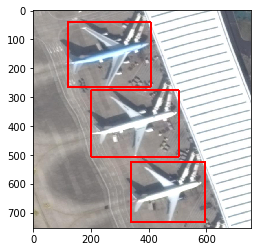

In [86]:
def get_rect(center, w, h):
    w = int(w)
    h = int(h)
    x, y = center
    x1 = int(x - w / 2 )
    y1 = int(y - h / 2)
    
    return x1, y1, x1 + w, y1 + h

def rotate_x(deg):
    # degreeをradianに変換
    r = np.radians(deg)
    C = np.cos(r)
    S = np.sin(r)
    # x軸周りの回転行列
    R_x = np.matrix((
        (1, 0, 0),
        (0, C, -S),
        (0, S, C)
    ))

    return R_x


def main():
    # 元の行列
    a = np.array((1,1,0))
    # 回転行列の生成
    Rx = rotate_x(90)
    # 回転後のベクトルを計算
    b = np.dot(Rx,a)
    # 整数型に変換
    b = np.array(b,dtype=np.uint8)
    print("a=" + str(a))
    print("R=" + str(Rx))
    print("b=" + str(b[0]))
#     465.837525364 627.858731845 256.753741002 207.864159476 
    print(get_rect((465.837525364, 627.858731845), 256.753741002, 207.864159476))
    img = cv2.imread('demo.tif')
    x1, y1, x2, y2 = get_rect((465.837525364, 627.858731845), 256.753741002, 207.864159476)
#     cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 5)
    print(x1, y1, x2, y2 )
    _, ax = plt.subplots()
    
    x1, y1, x2, y2 = get_rect((262.597330934, 152.695559891), 287.811671178, 225.521194166)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 5)

    x1, y1, x2, y2 = get_rect((352.980310194, 391.275257434 ), 302.48713802, 232.075645504)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 5)    
    
    
    x1, y1, x2, y2 = get_rect((465.837525364, 627.858731845), 256.753741002, 207.864159476)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    rect = patches.Rectangle((x1, y1), 256.753741002, 207.864159476,linewidth=2 ,edgecolor='r',facecolor='none', angle=0)

    
    ax.add_patch(rect)
    plt.show()
    
# 465.837525364 627.858731845 256.753741002 207.864159476 1 16.5859465751 1.0
# 262.597330934 152.695559891 287.811671178 225.521194166 1 15.5876309351 1.0
# 352.980310194 391.275257434 302.48713802 232.075645504 1 14.6078609555 1.0
    
if __name__ == '__main__':
    main()

256 207
337 524 593 731


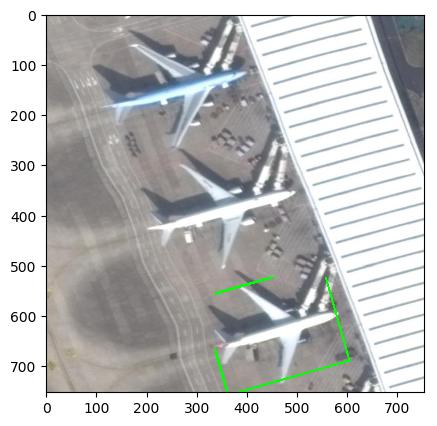

In [217]:
from PIL import Image, ImageDraw


def draw_rectangle(draw, coordinates, color, width): 
    for i in range(width): 
     rect_start = (coordinates[0][0] + i, coordinates[0][1] + i) 
     rect_end = (coordinates[1][0] - i, coordinates[1][1] - i) 
     draw.rectangle((rect_start, rect_end), outline = color) 
     i+=1

im = Image.open('demo.tif')
# 465.837525364 627.858731845 256.753741002 207.864159476 1 16.5859465751 1.0

cx, cy, w, h = 465.837525364, 627.858731845, 256.753741002, 207.864159476

overlay = Image.new('RGBA', (int(w), int(h)))
draw = ImageDraw.Draw(overlay)
print(overlay.width, overlay.height)
x1, y1, x2, y2 = get_rect((cx, cy), w, h)
print(x1, y1, x2, y2)

draw_rectangle(draw, ((0, 0), (256, 207)), color=(0, 255, 0), width=5) 


plt.figure(figsize=(5,5),dpi=100)



# SelectRotatedTarget.m rRectangle() を使っており、左下基準で回転させている
rotated = overlay.rotate(16, expand=True, center=(0, 207))
im.paste(rotated, (x1, y1), rotated)
plt.imshow(im)